# CHURN PREDICTION

## Exploratory Data Analysis

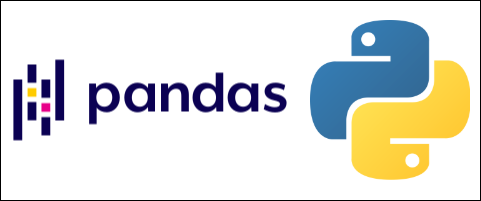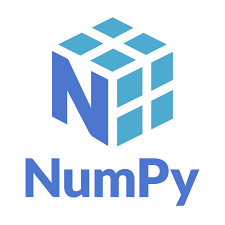

### Data Preparation

##### Import Pandas, Numpy and Matplotlib libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
import matplotlib.ticker as mtick

##### Prepare data
* Read data from excel file, set first column as the index column, and convert to pandas dataframe
* View dataframe information:
    - Data types
    - Values count
    - Column names

In [3]:
df = pd.read_excel(r"C:\Users\RonaldOnyango\Desktop\Misc\BIA Assignment.xlsx", index_col='Identifier')
df.head()

joined_date  gender   age  \
Identifier                                                    
63697470ede7fa7e107227c5  2022-07-11 00:00:00  female  23.0   
636970fede80962555cb5e36  2022-07-11 00:00:00    male  22.0   
636963a7de80962555cb5e1f  2022-07-11 00:00:00    male  29.0   
636962fcde80962555cb5e15  2022-07-11 00:00:00    male  23.0   
63696184de80962555cb5e0a  2022-07-11 00:00:00    male  26.0   

                             last active date  
Identifier                                     
63697470ede7fa7e107227c5  2022-11-08 00:00:00  
636970fede80962555cb5e36  2022-11-07 00:00:00  
636963a7de80962555cb5e1f  2022-11-07 00:00:00  
636962fcde80962555cb5e15            > 90 days  
63696184de80962555cb5e0a  2022-11-07 00:00:00

In [4]:
df.columns

Index(['joined_date', 'gender', 'age', 'last active date'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142902 entries, 63697470ede7fa7e107227c5 to 5ef55d5747d3881a67765258
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   joined_date       142901 non-null  object 
 1   gender            130577 non-null  object 
 2   age               141917 non-null  float64
 3   last active date  142902 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


### Data Cleaning

In [6]:
df['joined_date'].isna().value_counts()

False    142901
True          1
Name: joined_date, dtype: int64

In [7]:
df['gender'].isna().value_counts()

False    130577
True      12325
Name: gender, dtype: int64

In [8]:
df['age'].isna().value_counts()

False    141917
True        985
Name: age, dtype: int64

In [9]:
df['last active date'].isna().value_counts()

False    142902
Name: last active date, dtype: int64

***joined_date*** column has ***1*** missing value, ***gender*** column has ***12,325*** missing values and the ***age*** column has ***985*** missing values

1. From this data, we can drop the rows with null values in the joined_date and gender columns. 
2. We will calculate the average age from the data and fill null values in the column with the mean value of the age, which is ***26***.
3. Format the columns data types

In [10]:
df_ageMean = df['age'].mean()
df_ageMean

25.119858790701606

In [11]:
df_joinedDate = df.dropna(subset = ['joined_date'])

In [12]:
df_dropGenderNull = df_joinedDate.dropna(subset = ['gender'])

In [13]:
df_fillGenderMean = df_dropGenderNull.fillna(26)

In [14]:
df_dropGenderNull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130577 entries, 63697470ede7fa7e107227c5 to 5ef5dfdb2ab4cf551d8bcfd4
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   joined_date       130577 non-null  object 
 1   gender            130577 non-null  object 
 2   age               129911 non-null  float64
 3   last active date  130577 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.0+ MB


In [15]:
df['gender'].value_counts()

male      91372
female    35851
Male       2023
Female     1319
Other        12
Name: gender, dtype: int64

Replace the sentence case gender values to lowercase.

In [16]:
replace_genderValues = df_fillGenderMean.replace(['Male', 'Female'], ['male', 'female'])

In [17]:
gender_counts = replace_genderValues['gender'].value_counts()
gender_counts

male      93395
female    37170
Other        12
Name: gender, dtype: int64

In [20]:
df['joined_date'] = pd.to_datetime(df['joined_date']).dt.date 

In [23]:
df = df.astype({"age": int})

Add churn column indicating whether the user is active or not. A churned user is defined as user that has not visited the app for over 90 days

In [24]:
df['churn'] = np.where(df['last active date'] == "> 90 days", "Churned", "Active")
df

joined_date  gender  age     last active date  \
Identifier                                                               
63697470ede7fa7e107227c5  2022-07-11  female   23  2022-11-08 00:00:00   
636970fede80962555cb5e36  2022-07-11    male   22  2022-11-07 00:00:00   
636963a7de80962555cb5e1f  2022-07-11    male   29  2022-11-07 00:00:00   
636962fcde80962555cb5e15  2022-07-11    male   23            > 90 days   
63696184de80962555cb5e0a  2022-07-11    male   26  2022-11-07 00:00:00   
...                              ...     ...  ...                  ...   
5ef5ee15df376c7656e0c1f0  2020-06-26    male   45            > 90 days   
5ef5ea68df376c7656e0c1ec  2020-06-26  female   30  2022-10-27 00:00:00   
5ef5e90cdf376c7656e0c1ea  2020-06-26  female   20  2022-08-24 00:00:00   
5ef5e8692ab4cf551d8bcfd5  2020-06-26    male   21  2022-11-08 00:00:00   
5ef5dfdb2ab4cf551d8bcfd4  2020-06-26    male   33            > 90 days   

                            churn  
Identifier                         
63697470ede7fa7e107227c5   Active  
636970fede80962555cb5e36   Active  
636963a7de80962555cb5e1f   Active  
636962fcde80962555cb5e15  Churned  
63696184de80962555cb5e0a   Active  
...                           ...  
5ef5ee15df376c7656e0c1f0  Churned  
5ef5ea68df376c7656e0c1ec   Active  
5ef5e90cdf376c7656e0c1ea   Active  
5ef5e8692ab4cf551d8bcfd5   Active  
5ef5dfdb2ab4cf551d8bcfd4  Churned  

[130577 rows x 5 columns]

In [25]:
df['churn_rate'] = np.where(df['churn'] == "Churned", 1, 0)

Add count column. Set all values to 1

In [26]:
df['count'] = 1
df

joined_date  gender  age     last active date  \
Identifier                                                               
63697470ede7fa7e107227c5  2022-07-11  female   23  2022-11-08 00:00:00   
636970fede80962555cb5e36  2022-07-11    male   22  2022-11-07 00:00:00   
636963a7de80962555cb5e1f  2022-07-11    male   29  2022-11-07 00:00:00   
636962fcde80962555cb5e15  2022-07-11    male   23            > 90 days   
63696184de80962555cb5e0a  2022-07-11    male   26  2022-11-07 00:00:00   
...                              ...     ...  ...                  ...   
5ef5ee15df376c7656e0c1f0  2020-06-26    male   45            > 90 days   
5ef5ea68df376c7656e0c1ec  2020-06-26  female   30  2022-10-27 00:00:00   
5ef5e90cdf376c7656e0c1ea  2020-06-26  female   20  2022-08-24 00:00:00   
5ef5e8692ab4cf551d8bcfd5  2020-06-26    male   21  2022-11-08 00:00:00   
5ef5dfdb2ab4cf551d8bcfd4  2020-06-26    male   33            > 90 days   

                            churn  churn_rate  count  
Identifier                                            
63697470ede7fa7e107227c5   Active           0      1  
636970fede80962555cb5e36   Active           0      1  
636963a7de80962555cb5e1f   Active           0      1  
636962fcde80962555cb5e15  Churned           1      1  
63696184de80962555cb5e0a   Active           0      1  
...                           ...         ...    ...  
5ef5ee15df376c7656e0c1f0  Churned           1      1  
5ef5ea68df376c7656e0c1ec   Active           0      1  
5ef5e90cdf376c7656e0c1ea   Active           0      1  
5ef5e8692ab4cf551d8bcfd5   Active           0      1  
5ef5dfdb2ab4cf551d8bcfd4  Churned           1      1  

[130577 rows x 7 columns]

In [27]:
churn_rate = df['churn_rate'].value_counts()
churn_rate

1    123223
0      7354
Name: churn_rate, dtype: int64

In [28]:
churn_counts = df['churn'].value_counts()
churn_counts

Churned    123223
Active       7354
Name: churn, dtype: int64

In [29]:
df['AgeBand'] = np.where(df['last active date'] == "> 90 days", "Churned", "Active")

In [30]:
conditions =[
    (df['age']<20),
    (df['age']>=20) & (df['age']<25),
    (df['age']>=25) & (df['age']<31),
    (df['age']>=31) & (df['age']<36),
    (df['age']>35)
]
values = ['Under 20', '20 and 24', '25 and 30', '31 and 35', 'Above 35']
df['AgeBand'] = np.select(conditions, values)

In [31]:
AgeBand_count = df['AgeBand'].value_counts()
AgeBand_count

20 and 24    67645
25 and 30    38993
31 and 35     9762
Under 20      8217
Above 35      5960
Name: AgeBand, dtype: int64

### Visualization

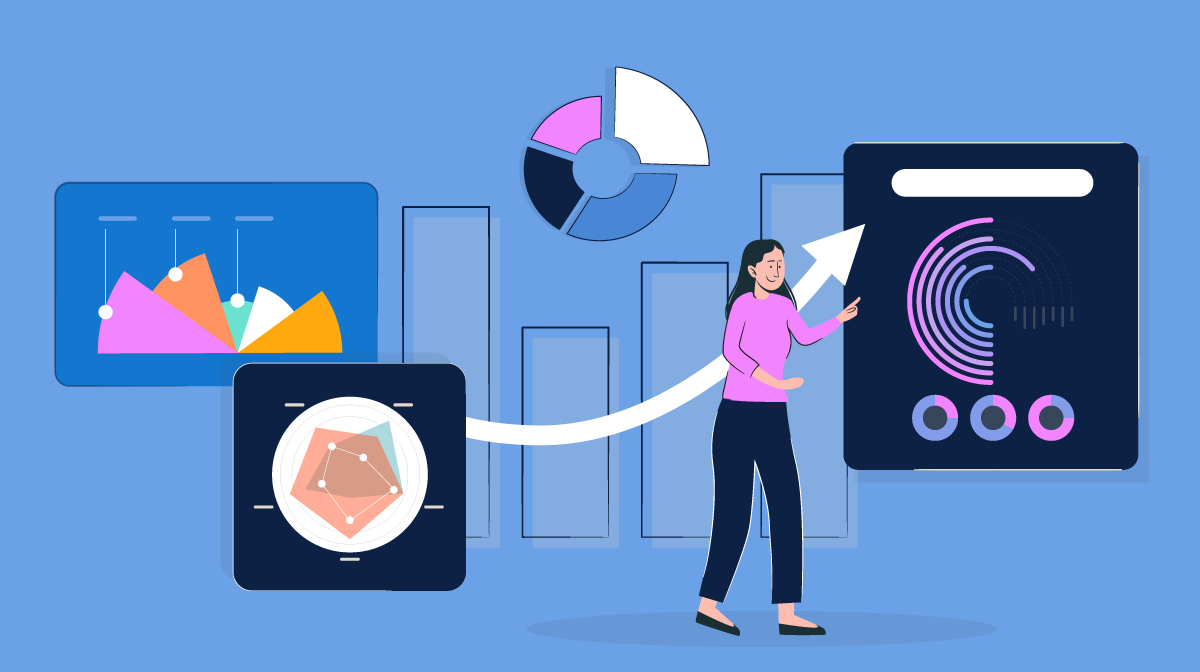

***Total Users by Gender***

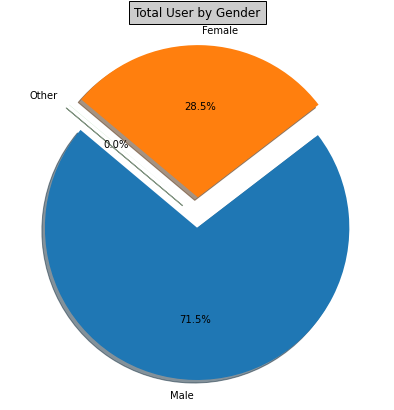

In [42]:
churn_label = ['Male', "Female", 'Other']
#colors = ['#23dcc2', '#fab400']
explode = (0.1, 0.1, 0.1)
fig = plt.figure(figsize =(10, 7))
plt.pie(gender_counts, labels = churn_label,autopct='%1.1f%%', shadow=True, startangle=140, explode = explode)
plt.title("Total User by Gender", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

***Age Distribution of User***

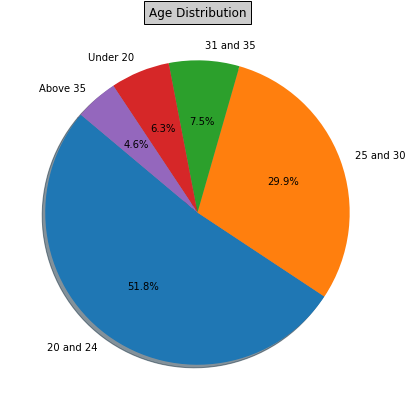

In [51]:
churn_label = ['20 and 24', "25 and 30", '31 and 35', 'Under 20', 'Above 35']
#colors = ['#23dcc2', '#fab400']
#explode = (0.1, 0.1, 0.1)
fig = plt.figure(figsize =(10, 7))
plt.pie(AgeBand_count, labels = churn_label,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Age Distribution", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

***Total Active User Base vs Total Churned User Base***

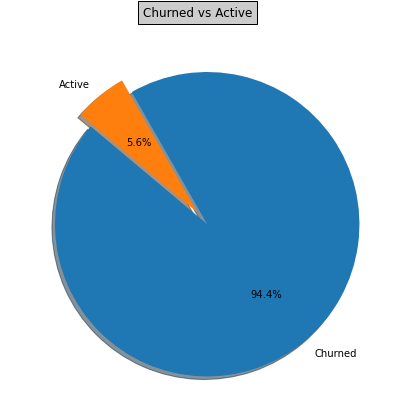

In [32]:
churn_label = ['Churned', "Active"]
#colors = ['#23dcc2', '#fab400']
explode = (0.1, 0)
fig = plt.figure(figsize =(10, 7))
plt.pie(churn_counts, labels = churn_label,autopct='%1.1f%%', shadow=True, startangle=140, explode = explode,)
plt.title("Churned vs Active", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

***Churn Rate by Year Joined***

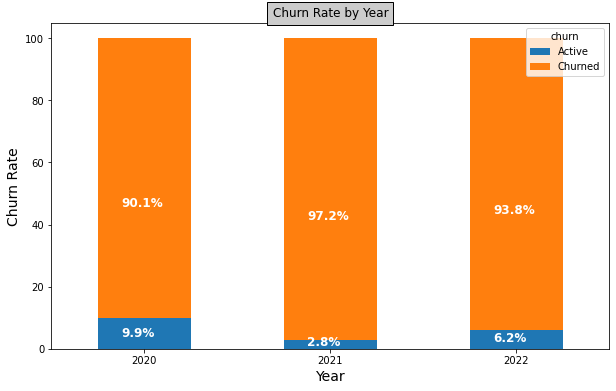

In [33]:
ax = ((df.groupby(lambda x: df['joined_date'][x].year)['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, rot =0 ,figsize=(10, 6))
)
plt.title("Churn Rate by Year", bbox={'facecolor':'0.8', 'pad':5})
ax.set_ylabel('Churn Rate',size = 14 )
ax.set_xlabel('Year', size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')

***Churn Rate by Gender Distribution***

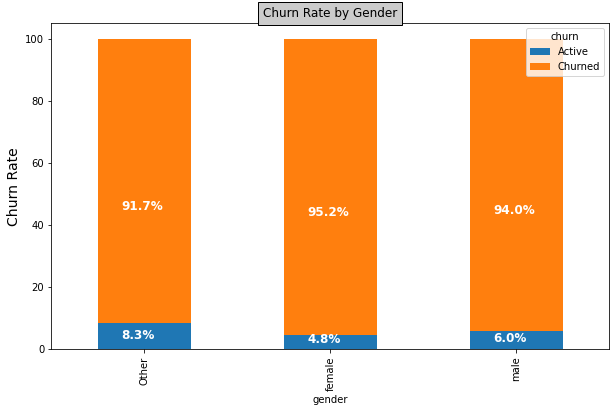

In [34]:
ax = ((df.groupby('gender')['churn'].value_counts(normalize=True)*100.0)
   .unstack('churn').plot.bar(stacked=True, figsize=(10, 6))
)
plt.title("Churn Rate by Gender", bbox={'facecolor':'0.8', 'pad':5})
ax.set_ylabel('Churn Rate',size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')

***Churn Rate by Age Distribution***

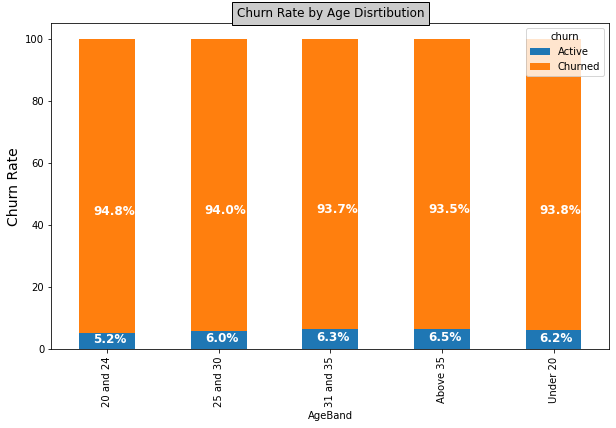

In [53]:
ax = ((df.groupby('AgeBand')['churn'].value_counts(normalize=True)* 100.0)
   .unstack('churn').plot.bar(stacked=True, figsize=(10, 6))
)
plt.title("Churn Rate by Age Disrtibution", bbox={'facecolor':'0.8', 'pad':5})
ax.set_ylabel('Churn Rate',size = 14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
   # x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), fontsize=12,
            color='white',
           weight = 'bold')